## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras import datasets as dts
import matplotlib.pyplot as plt
import numpy as np

## me-load dan mambagi dataset

In [2]:
(x_train, y_train),(x_test, y_test) = dts.boston_housing.load_data()

## melihat panjang setiap set

In [3]:
print(f'panjang x train : {len(x_train)} ',
      f'panjang y train : {len(y_train)} ',
      f'panjang x test : {len(x_test)} ',
      f'panjang y test : {len(y_test)} ',
      sep='\n')

panjang x train : 404 
panjang y train : 404 
panjang x test : 102 
panjang y test : 102 


## membuat copy dari test set

In [4]:
simpan_x_test = x_test.copy()

## mengubah dataset ke bentuk matrix

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = None, dtype='float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes = None, dtype='float32')

## Melihat masing-msing dimensi set

In [6]:
print(f'x train data : {x_train.shape}')
print(f'y train data : {y_train.shape}')
print(f'x test data : {x_test.shape}')
print(f'y test data : {y_test.shape}')

x train data : (404, 13)
y train data : (404, 51)
x test data : (102, 13)
y test data : (102, 51)


In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## membuat model sequential

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(51, activation='relu', input_dim=13),
    tf.keras.layers.Dense(51, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 51)                714       
                                                                 
 dense_1 (Dense)             (None, 51)                2652      
                                                                 
Total params: 3,366
Trainable params: 3,366
Non-trainable params: 0
_________________________________________________________________


## meng-compile model

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

## training model

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    steps_per_epoch = 24,
    verbose=2,
    validation_data=(x_test, y_test)
)

Epoch 1/20
24/24 - 1s - loss: 3.8540 - accuracy: 0.0198 - val_loss: 3.8356 - val_accuracy: 0.0196 - 803ms/epoch - 33ms/step
Epoch 2/20
24/24 - 0s - loss: 3.7320 - accuracy: 0.0668 - val_loss: 3.7394 - val_accuracy: 0.0490 - 110ms/epoch - 5ms/step
Epoch 3/20
24/24 - 0s - loss: 3.6066 - accuracy: 0.1089 - val_loss: 3.6487 - val_accuracy: 0.0882 - 90ms/epoch - 4ms/step
Epoch 4/20
24/24 - 0s - loss: 3.4866 - accuracy: 0.0916 - val_loss: 3.5727 - val_accuracy: 0.0980 - 90ms/epoch - 4ms/step
Epoch 5/20
24/24 - 0s - loss: 3.3879 - accuracy: 0.0965 - val_loss: 3.5302 - val_accuracy: 0.0882 - 100ms/epoch - 4ms/step
Epoch 6/20
24/24 - 0s - loss: 3.3257 - accuracy: 0.1188 - val_loss: 3.5169 - val_accuracy: 0.0490 - 120ms/epoch - 5ms/step
Epoch 7/20
24/24 - 0s - loss: 3.2826 - accuracy: 0.0941 - val_loss: 3.5071 - val_accuracy: 0.0392 - 103ms/epoch - 4ms/step
Epoch 8/20
24/24 - 0s - loss: 3.2579 - accuracy: 0.0941 - val_loss: 3.4996 - val_accuracy: 0.0588 - 97ms/epoch - 4ms/step
Epoch 9/20
24/24 -

## mengevaluasi model

In [20]:
score = model.evaluate(
    x_test, 
    y_test, 
    verbose=0
) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 3.419245481491089
Test accuracy: 0.0882352963089943


## Visualisasi akurasi model

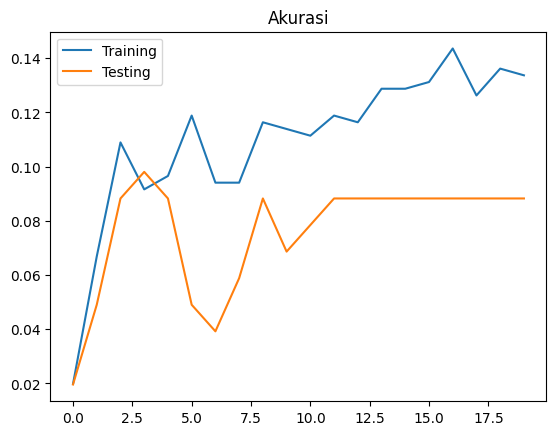

In [12]:
plt.plot(range(len(history.history['accuracy'])),
        history.history['accuracy'],
        label='Training')
plt.plot(range(len(history.history['val_accuracy'])),
        history.history['val_accuracy'],
        label='Testing')
plt.title("Akurasi")
plt.legend()
plt.show()

## Visualisasi loss model

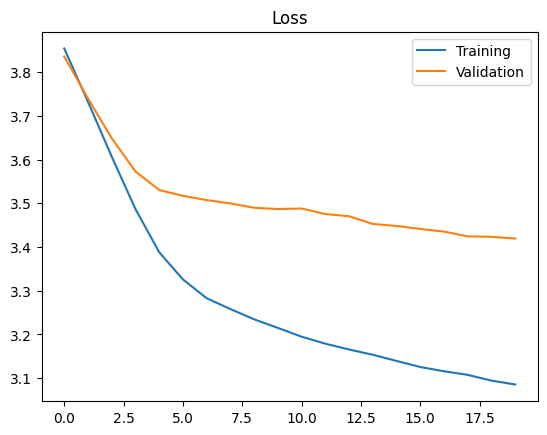

In [13]:
plt.plot(range(len(history.history['loss'])),
        history.history['loss'],
        label='Training')
plt.plot(range(len(history.history['val_loss'])),
        history.history['val_loss'],
        label='Validation')
plt.title("Loss")
plt.legend()
plt.show()

## saving the model

In [14]:
model.save('model/save_model.h5')

## Loading the model that saved before

In [15]:
save_model = tf.keras.models.load_model('model/save_model.h5')

## using predict to see the result

In [17]:
hasil = save_model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


## to see the result shape

In [18]:
hasil.shape

(102, 51)

## maximum value from the result in index 5 in numpy

In [21]:
tf.argmax(hasil[5]).numpy()

19